## 基于pandas实现时间格式的处理

不导入time、datetime等模块，直接用pandas处理Excel中的时间数据

基础知识点可以看自己的整理：https://github.com/QLWeilcf/mindmapNotes/blob/master/pandasAndTime.xmind

### 早午晚餐消费切分

- 读入数据，转换某列为时间类型
- 早午晚餐分类
- 时间间隔计算
- 绘制箱线图

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('cost-data-2018.xls')
df.head(2)  #读入数据

,子类,人员,日期
0,早午晚餐,本人,2018-12-31 17:03:26
1,早午晚餐,本人,2018-12-31 11:35:02


In [6]:
type(df['日期'][0]) #还是字符串格式

str

In [7]:
df['消费时间']=pd.to_datetime(df['日期'])  #转换为时间类型
type(df['消费时间'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df=df.loc[df['子类']=='早午晚餐'] #只研究早午晚餐类型

In [11]:
def eatClassing(x):#早午晚餐分类
    if 0<=x.hour<10:
        return '早餐'
    elif 10<=x.hour<16:
        return '午餐'
    return '晚餐'
    
'''
映射规则：
type   常规   泛化
早餐   4-9    0-10
午餐 10:30-14 10-16
晚餐  16-21   16-24
'''
eatClassing(df['消费时间'][0]) #测试

'晚餐'

In [13]:
df['ecls']=df['消费时间'].apply(eatClassing)
df.head(2)

,子类,人员,日期,消费时间,ecls
0,早午晚餐,本人,2018-12-31 17:03:26,2018-12-31 17:03:26,晚餐
1,早午晚餐,本人,2018-12-31 11:35:02,2018-12-31 11:35:02,午餐


In [36]:

len(df[df['ecls']=='早餐']) #2年的数据

451

In [45]:
#2018吃早餐天数
df['years']=df['消费时间'].apply(lambda x:x.year)
sdf=df.loc[df['years']==2018]
dd=len(sdf[sdf['ecls']=='早餐'])
ddr=dd/(pd.Timestamp('2018-12-31')-pd.Timestamp('2018-1-1')).days #吃早餐比率
print(dd,ddr)

201 0.5521978021978022


In [16]:
df['tday']=df['消费时间'].apply(lambda x:pd.Timestamp(x.strftime('%Y-%m-%d')))

In [18]:
df['tfour']=df.apply(lambda x:(x['消费时间']-x['tday']).seconds/3600,axis=1)

In [19]:
df.head(4)

,子类,人员,日期,消费时间,ecls,tday,tfour
0,早午晚餐,本人,2018-12-31 17:03:26,2018-12-31 17:03:26,晚餐,2018-12-31,17.057222
1,早午晚餐,本人,2018-12-31 11:35:02,2018-12-31 11:35:02,午餐,2018-12-31,11.583889
2,早午晚餐,本人,2018-12-30 17:02:02,2018-12-30 17:02:02,晚餐,2018-12-30,17.033889
3,早午晚餐,本人,2018-12-30 11:45:25,2018-12-30 11:45:25,午餐,2018-12-30,11.756944


In [24]:
#好像还有更简单的方法：
df['tfs']=df['消费时间'].apply(lambda x:x.hour+x.minute/60+x.second/3600)
df.head(4)

,子类,人员,日期,消费时间,ecls,tday,tfour,tfs
0,早午晚餐,本人,2018-12-31 17:03:26,2018-12-31 17:03:26,晚餐,2018-12-31,17.057222,17.057222
1,早午晚餐,本人,2018-12-31 11:35:02,2018-12-31 11:35:02,午餐,2018-12-31,11.583889,11.583889
2,早午晚餐,本人,2018-12-30 17:02:02,2018-12-30 17:02:02,晚餐,2018-12-30,17.033889,17.033889
3,早午晚餐,本人,2018-12-30 11:45:25,2018-12-30 11:45:25,午餐,2018-12-30,11.756944,11.756944


In [25]:
#绘制箱线图
import matplotlib.pyplot as plt
%matplotlib inline

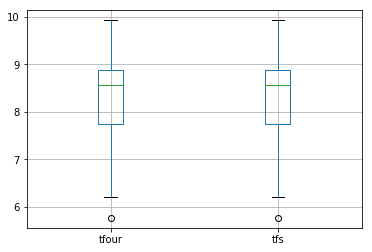

In [26]:
mor=df[df['ecls']=='早餐']
mor.boxplot()

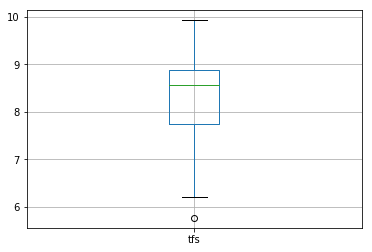

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
mor=df.loc[df['ecls']=='早餐',['tfs']]
mor.boxplot()
#可以看到集中在7.45~9点吃早餐

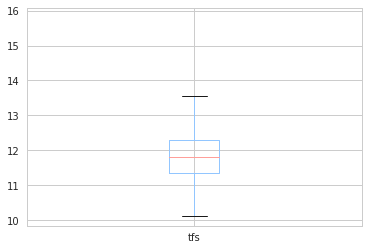

In [32]:
mor1=df.loc[df['ecls']=='午餐',['tfs']]
mor1.boxplot()

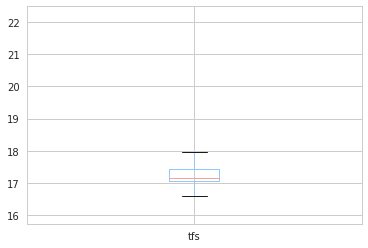

In [33]:
mor2=df.loc[df['ecls']=='晚餐',['tfs']]
mor2.boxplot()

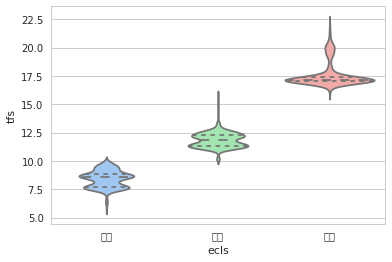

In [31]:
# 绘制小提琴图（violinplot）
import seaborn as sns
vdf=df.sort_values(by=['消费时间'])
sns.set(style="whitegrid",palette="pastel",color_codes='ture')
sns.violinplot(x="ecls", y="tfs", data=vdf, split=True,inner="quart")

对比以上结果，可以看到的是：早餐时间不够固定，波动较大，而晚餐是最稳定的，基本集中在17~17:30这个区间；午餐有两个集中的时间，11点和12点10分

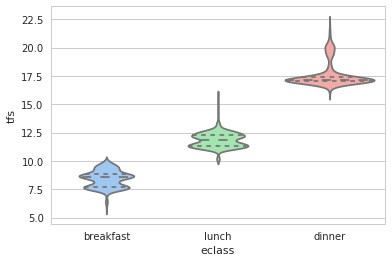

In [34]:
#因为matplotlib对中文支持不是很好，就转换为英文版的
k={'早餐':'breakfast','午餐':'lunch','晚餐':'dinner'}
vdf['eclass']=vdf['ecls'].apply(lambda x:k[x])

sns.violinplot(x="eclass", y="tfs", data=vdf, split=True,inner="quart")

## 基于pandas的时间序列
官网说：
> class pandas.Timestamp

> Pandas replacement for python datetime.datetime object.

### 获取当前时刻的时间

In [46]:
pd.Timestamp.today()

Timestamp('2019-09-26 00:26:34.989516')

In [47]:
pd.Timestamp.now()

Timestamp('2019-09-26 00:26:43.299497')

In [48]:
now=pd.Timestamp.now()
now.year

2019

In [49]:
print(now.year,now.month,now.day)

2019 9 26


In [64]:
now.weekday()

3

In [51]:
now.dayofweek # 本周第几天；这个是从0计数的，周一是0，周日是6；周三是2

3

In [52]:
now.weekofyear   #当前时刻所在周数；2019年的第39周

39

In [53]:
#指定日期和时间格式
#只展示年月日
now.date()

datetime.date(2019, 9, 26)

In [54]:
now.strftime('%Y/%m/%d') #转成特定字符串

'2019/09/26'

In [55]:
pd.Timestamp.strptime(now.strftime('%Y/%m/%d'),'%Y/%m/%d')
#strptime和strftime是对立的，strptime将特定格式的字符串形式的时间数据转为timestamp对象；
#另外直接对一列操作可以用 df['消费时间']=pd.to_datetime(df['日期']) 也很好用

Timestamp('2019-09-26 00:00:00')

In [ ]:
# 时间索引
#用ppd.DatetimeIndex 或通过 df['years']=df['时间'].apply(lambda x:x.year) 新建一列年份来做索引
df['years']=df['消费时间'].apply(lambda x:x.year)

### 时间运算
#### 时间差值

In [56]:
#两个timestamp对象可以直接相减；时间戳减时间戳得到时间间隔（不能时间戳+时间戳)
#时间戳减时间间隔得到新的时间戳；时间间隔之间可以互相加减
now-pd.Timestamp('2019-9-23')

Timedelta('3 days 00:27:19.338377')

In [57]:
cha=now-pd.Timestamp('2019-9-23')
cha.days  #注意是days不是day

3

In [58]:
cha.seconds

1639

In [60]:
cha.total_seconds() #区分这个和seconds

260839.338377

In [61]:
#seconds的秒时间，不包括天的部分；
pd.Timedelta(1.5,unit='d').seconds #是43200而非129600 total_seconds()是129600

43200

#### 时间偏移
也是用Timedelta实现；
或者用pd.tseries.offsets 

In [65]:
now-pd.Timedelta(1,unit='d') #往前推一天

Timestamp('2019-09-25 00:27:19.338377')

In [63]:
now+pd.Timedelta(10,unit='M') #往后推10分钟

Timestamp('2020-07-26 09:18:19.338377')

## 参考资料
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timedelta.html
